In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [3]:
df.y.unique()

array([1, 0], dtype=int64)

In [12]:
df.shape

(2227, 3)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [3]:
# Let us remove the null rows of x1 and x2
df.dropna(axis=0,inplace=True)

In [49]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

<AxesSubplot:>

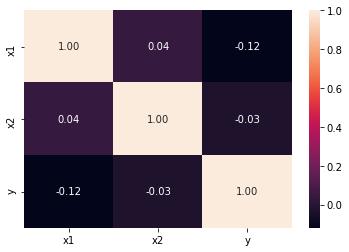

In [17]:
sns.heatmap(round(df.corr(),2),annot=True,fmt='.2f')

In [ ]:
# The output variiable y has little to no corelation with the two variable.

In [19]:
df.describe()

,x1,x2,y
count,2219.000000,2.219000e+03,2219.000000
mean,-4.771837,8.967782e+04,0.442091
std,74.938264,2.986680e+06,0.496747
min,-134.369160,-1.348761e+02,0.000000
25%,-71.581453,-8.025966e+01,0.000000
50%,-9.750840,-1.566092e+00,0.000000
75%,59.963056,6.390448e+01,1.000000
max,134.508687,1.000000e+08,1.000000


array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>],
       [<AxesSubplot:title={'center':'y'}>, <AxesSubplot:>]], dtype=object)

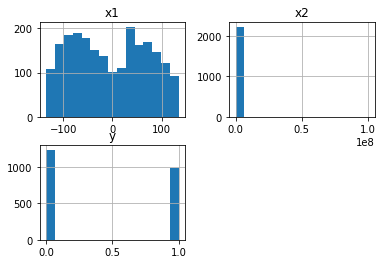

In [20]:
df.hist(bins=15)

In [33]:
df.shape

(2219, 3)

In [4]:
# Removing the Outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)

x1    131.544509
x2    144.164141
y       1.000000
dtype: float64
(2217, 3)


array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>],
       [<AxesSubplot:title={'center':'y'}>, <AxesSubplot:>]], dtype=object)

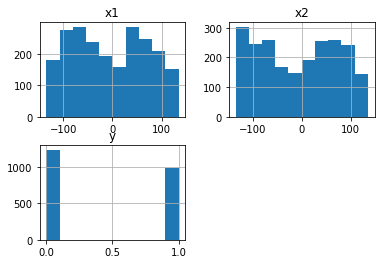

In [35]:
df.hist()

In [36]:
df.y.value_counts()

0    1236
1     981
Name: y, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

In [6]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve

In [8]:
from sklearn.model_selection import GridSearchCV

In [38]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
predictions_test = lr.predict(X_test)
print(classification_report(y_test, predictions_test))
print('Accuracy Score on test',accuracy_score(y_test, predictions_test))
cm_test = confusion_matrix(y_true=y_test, y_pred = predictions_test)
print(pd.DataFrame(cm_test))

              precision    recall  f1-score   support

           0       0.68      0.99      0.81       367
           1       0.98      0.43      0.60       299

    accuracy                           0.74       666
   macro avg       0.83      0.71      0.70       666
weighted avg       0.82      0.74      0.71       666

Accuracy Score on test 0.7402402402402403
     0    1
0  365    2
1  171  128


In [7]:
def func(cm_test):
    Row1sum = cm_test[0,1] + cm_test[0,0]
    Row2sum = cm_test[1,1] + cm_test[1,0]
    Col1sum = cm_test[1,0] + cm_test[0,0]
    Col2sum = cm_test[1,1] + cm_test[0,1]
    Total = Row1sum+Row2sum
    FPR =cm_test[0,1] / Row1sum
    TPR = cm_test[1,1] / Row2sum
    Precision = cm_test[1,1] / Col2sum
    Accuracy = (cm_test[0,0] + cm_test[1,1])/Total
    F1Score = (2 * (Precision*Accuracy))/( Precision + Accuracy)
    Specificity = cm_test[0,0]/ Row1sum
    Cohen_Kappa_score = ((Row1sum * Col1sum) + (Row2sum * Col2sum))/(Total**2)
    print('False Positive Rate is',FPR )
    print('True Positive Rate is',TPR )
    print('Precision is',Precision )
    print('Accuracy is',Accuracy )
    print('F1Score is',F1Score )
    print('Specificity is',Specificity )
    print('Cohen_Kappa_score is',Cohen_Kappa_score )

In [39]:
func(cm_test)

False Positive Rate is 0.005449591280653951
True Positive Rate is 0.4280936454849498
Precision is 0.9846153846153847
Accuracy is 0.7402402402402403
F1Score is 0.8451164472538806
Specificity is 0.9945504087193461
Cohen_Kappa_score is 0.5311212113013914


In [40]:
grid_param = {'multi_class':['auto', 'ovr', 'multinomial'],'max_iter':range(95,105,1),'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_search = GridSearchCV(estimator=lr,param_grid = grid_param,cv=5)
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_
print(best_params)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

{'max_iter': 96, 'multi_class': 'ovr', 'solver': 'sag'}


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.73822633 0.73822633 0.73822633 0.73757909 0.7337019  0.73822633
 0.73822633 0.73822633 0.73822425 0.73176641 0.73822633 0.73822633
        nan 0.73822633 0.73758116 0.73822633 0.73822633 0.73822633
 0.73757909 0.73370397 0.73822633 0.73822633 0.73822633 0.73886941
 0.73305881 0.73822633 0.73822633        nan 0.73822633 0.73757909
 0.73822633 0.73822633 0.73822633 0.73757909 0.73305881 0.73822633
 0.73822633 0.73822633 0.73757909 0.72467171 0.73822633 0.73822633
        nan 0.73822633 0.73886941 0.73822633 0.73822633 0.73822633
 0.73822425 0.73434913 0.73822633 0.73822633 0.73822633 0.73757909
 0.7349943  0.73822633 0.73822633        nan 0.73822633 0.73886941
 0.73822633 0.73822633 0.73822633 0.73757909 0.73370397 0.73822633
 0.73822633 0.73822633 0.73757909 0.729833   0.73822633 0.73822633
        nan 0.73822633 0.73757909 0.73822633 0.738226

In [ ]:
# Best Parameters : {'max_iter': 96, 'multi_class': 'ovr', 'solver': 'sag'}

In [41]:
logmodel = LogisticRegression(max_iter= 96, multi_class='ovr', solver='sag')
logmodel.fit(X_train,y_train)
predictions_test = logmodel.predict(X_test)
df_pred = pd.DataFrame(logmodel.predict_proba(X_test))
df_pred['Final_Pred'] = predictions_test
df_pred.head()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


,0,1,Final_Pred
0,0.390073,0.609927,1
1,0.601359,0.398641,0
2,0.573036,0.426964,0
3,0.435006,0.564994,1
4,0.556925,0.443075,0


In [43]:
lr=LogisticRegression(max_iter= 96, multi_class='ovr', solver='sag')
lr.fit(X_train,y_train)
predictions_test = lr.predict(X_test)
print(classification_report(y_test, predictions_test))
print('Accuracy Score on train',accuracy_score(y_train, lr.predict(X_train)))                   
print('Accuracy Score on test',accuracy_score(y_test, predictions_test))
cm_test = confusion_matrix(y_true=y_test, y_pred = predictions_test)
print(pd.DataFrame(cm_test))

              precision    recall  f1-score   support

           0       0.68      0.99      0.81       367
           1       0.98      0.43      0.60       299

    accuracy                           0.74       666
   macro avg       0.83      0.71      0.71       666
weighted avg       0.82      0.74      0.72       666

Accuracy Score on train 0.7446808510638298
Accuracy Score on test 0.7417417417417418
     0    1
0  364    3
1  169  130


In [44]:
func(cm_test)

False Positive Rate is 0.008174386920980926
True Positive Rate is 0.43478260869565216
Precision is 0.9774436090225563
Accuracy is 0.7417417417417418
F1Score is 0.8434352057367254
Specificity is 0.9918256130790191
Cohen_Kappa_score is 0.5306612919225532


In [ ]:
# Accuracy has increased from 0.740 to 0.741

Test AUC : 0.713


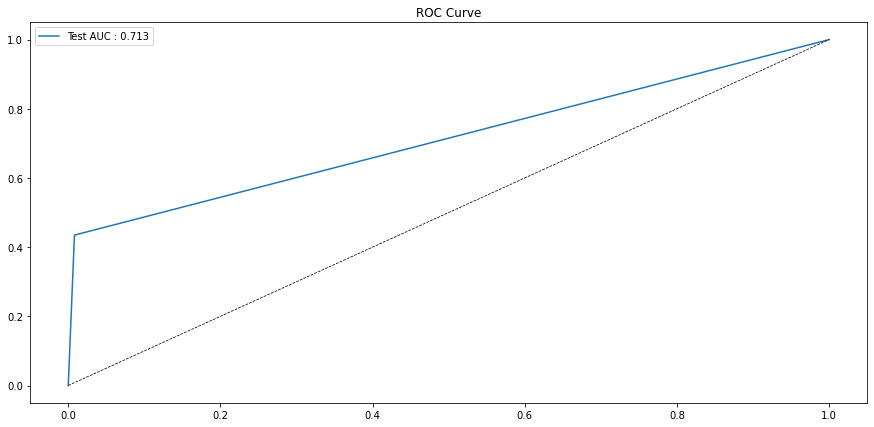

In [45]:
FPR1,TPR1,_ = roc_curve(y_test,predictions_test)
auc_test = auc(FPR1,TPR1)
print('Test AUC : %0.3f' % auc_test)
plt.figure(figsize=(15,7))
plt.plot(FPR1,TPR1, label='Test AUC : %0.3f' % auc_test)
plt.plot([0,1],[0,1],ls='--',color='black',lw = 0.75)
plt.title('ROC Curve')
plt.legend()
plt.show()

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [47]:
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy Score on test',accuracy_score(y_test, y_pred))
cm_test = confusion_matrix(y_true=y_test, y_pred = y_pred)
print(pd.DataFrame(cm_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       367
           1       0.93      0.96      0.94       299

    accuracy                           0.95       666
   macro avg       0.95      0.95      0.95       666
weighted avg       0.95      0.95      0.95       666

Accuracy Score on test 0.948948948948949
     0    1
0  346   21
1   13  286


In [63]:
grid_param = {'n_neighbors':range(1,11,1),'weights':['uniform','distance'],'p':[1,2]}
grid_search = GridSearchCV(estimator=knc,param_grid = grid_param,cv=5)
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_
print(best_params)

{'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}


In [62]:
knc = KNeighborsClassifier(n_neighbors= 8, p= 1, weights= 'uniform')
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy Score on train',accuracy_score(y_train, knc.predict(X_train)))
print('Accuracy Score on test',accuracy_score(y_test, y_pred))
cm_test = confusion_matrix(y_true=y_test, y_pred = y_pred)
print(pd.DataFrame(cm_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       367
           1       0.93      0.94      0.93       299

    accuracy                           0.94       666
   macro avg       0.94      0.94      0.94       666
weighted avg       0.94      0.94      0.94       666

Accuracy Score on train 0.9593810444874274
Accuracy Score on test 0.9414414414414415
     0    1
0  347   20
1   19  280


In [54]:
func(cm_test)

False Positive Rate is 0.05449591280653951
True Positive Rate is 0.9364548494983278
Precision is 0.9333333333333333
Accuracy is 0.9414414414414415
F1Score is 0.9373698542367451
Specificity is 0.9455040871934605
Cohen_Kappa_score is 0.5050591131672213


Test AUC : 0.941


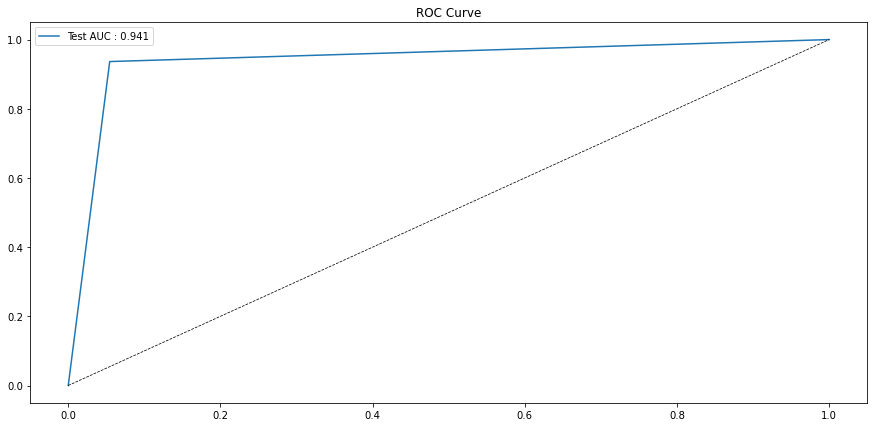

In [55]:
FPR1,TPR1,_ = roc_curve(y_test,y_pred)
auc_test = auc(FPR1,TPR1)
print('Test AUC : %0.3f' % auc_test)
plt.figure(figsize=(15,7))
plt.plot(FPR1,TPR1, label='Test AUC : %0.3f' % auc_test)
plt.plot([0,1],[0,1],ls='--',color='black',lw = 0.75)
plt.title('ROC Curve')
plt.legend()
plt.show()

In [56]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [57]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy Score on test',accuracy_score(y_test, y_pred))
cm_test = confusion_matrix(y_true=y_test, y_pred = y_pred)
print(pd.DataFrame(cm_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       367
           1       0.91      0.93      0.92       299

    accuracy                           0.93       666
   macro avg       0.93      0.93      0.93       666
weighted avg       0.93      0.93      0.93       666

Accuracy Score on test 0.9294294294294294
     0    1
0  341   26
1   21  278


In [58]:
grid_param = {'criterion':['gini', 'entropy'],'max_depth':range(2,17,1),'min_samples_leaf':range(1,10,1),'splitter':['best','random']}
grid_search = GridSearchCV(estimator=clf,param_grid = grid_param,cv=5) 
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_
print(best_params)

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 3, 'splitter': 'random'}


In [64]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=15,min_samples_leaf=3,splitter='random')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy Score on train',accuracy_score(y_train, clf.predict(X_train)))
print('Accuracy Score on test',accuracy_score(y_test, y_pred))
cm_test = confusion_matrix(y_true=y_test, y_pred = y_pred)
print(pd.DataFrame(cm_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       367
           1       0.93      0.96      0.95       299

    accuracy                           0.95       666
   macro avg       0.95      0.95      0.95       666
weighted avg       0.95      0.95      0.95       666

Accuracy Score on train 0.9574468085106383
Accuracy Score on test 0.9504504504504504
     0    1
0  346   21
1   12  287


In [65]:
func(cm_test)

False Positive Rate is 0.05722070844686648
True Positive Rate is 0.959866220735786
Precision is 0.9318181818181818
Accuracy is 0.9504504504504504
F1Score is 0.941042097247906
Specificity is 0.9427792915531336
Cohen_Kappa_score is 0.5038326614903191


Test AUC : 0.951


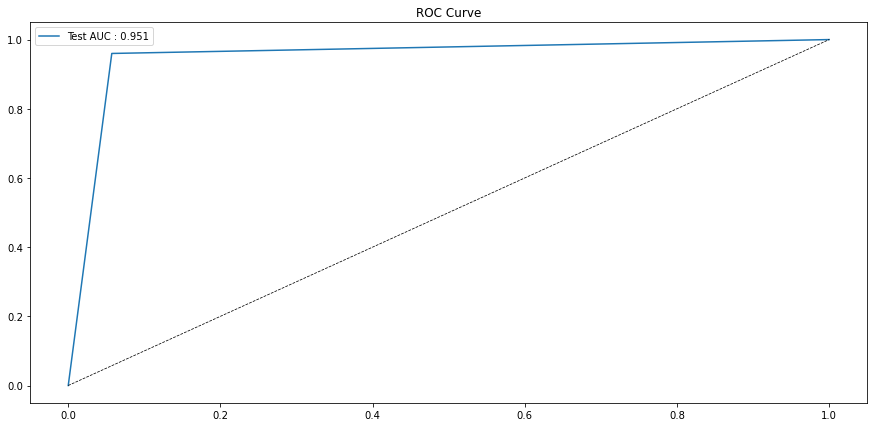

In [66]:
FPR1,TPR1,_ = roc_curve(y_test,y_pred)
auc_test = auc(FPR1,TPR1)
print('Test AUC : %0.3f' % auc_test)
plt.figure(figsize=(15,7))
plt.plot(FPR1,TPR1, label='Test AUC : %0.3f' % auc_test)
plt.plot([0,1],[0,1],ls='--',color='black',lw = 0.75)
plt.title('ROC Curve')
plt.legend()
plt.show()

In [9]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc1 = svm.SVC(kernel='rbf')

In [12]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [69]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy Score on test',accuracy_score(y_test, y_pred))
cm_test = confusion_matrix(y_true=y_test, y_pred = y_pred)
print(pd.DataFrame(cm_test))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       367
           1       1.00      0.41      0.58       299

    accuracy                           0.74       666
   macro avg       0.84      0.71      0.69       666
weighted avg       0.82      0.74      0.71       666

Accuracy Score on test 0.7357357357357357
     0    1
0  367    0
1  176  123


In [10]:
svc1 = svm.SVC(kernel='rbf',gamma=0.8)
svc1.fit(X_train,y_train)
y_pred = svc1.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy Score on test',accuracy_score(y_test, y_pred))
cm_test = confusion_matrix(y_true=y_test, y_pred = y_pred)
print(pd.DataFrame(cm_test))

              precision    recall  f1-score   support

           0       0.60      0.98      0.75       367
           1       0.88      0.22      0.35       299

    accuracy                           0.64       666
   macro avg       0.74      0.60      0.55       666
weighted avg       0.73      0.64      0.57       666

Accuracy Score on test 0.6351351351351351
     0   1
0  358   9
1  234  65


In [14]:
print('Accuracy Score on train of Linear',accuracy_score(y_train, svc.predict(X_train)))
print('Accuracy Score on train of rbf',accuracy_score(y_train, svc1.predict(X_train)))

Accuracy Score on train of Linear 0.7330754352030948
Accuracy Score on train of rbf 0.9993552546744036


In [ ]:
# It was taking too much time to do the hyperparameter tuning of svm Linear and svm rbf through the Grid Cross Validation, so that part couldnt be done.

Logistic Regression    
Accuracy Score on train 0.7446808510638298
Accuracy Score on test 0.7417417417417418\

SVM with Linear Kernel
Accuracy Score on train of Linear 0.7330754352030948
Accuracy Score on test 0.7357357357357357

SVM with RBF Kernel
Accuracy Score on train of rbf 0.9993552546744036
Accuracy Score on test 0.6351351351351351

Decision Tree
Accuracy Score on train 0.9574468085106383
Accuracy Score on test 0.9504504504504504

KNN                            
Accuracy Score on train 0.9593810444874274
Accuracy Score on test 0.9414414414414415

Since    Decision Tree model is giving the least difference between test and train accuracy and they both are good, hence it is the best model